In [209]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.cluster import KMeans

In [199]:
file = open("NET_DEBT_EBITDA_Data.csv", "r")
next(file)
NDE_Dict = {}
n = 0

for row in file:
    i,m,date,d = row.split(",")

    if i in NDE_Dict.keys():
        _,D = d.split(":")
        NDE_Dict[i].append((date,float(D[1:4])))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        NDE_Dict[i] = [(date,float(D[1:4]))]
        

file.close()
n = 0
for i in NDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('"00017f58-baec-51fd-9a90-e2acae968457"', [('"1997-12-27"', 0.0), ('"1996-12-28"', 0.9), ('"1995-12-30"', 1.2)]) 

('"0001e381-e787-576d-8183-56e0f5f4a895"', [('"2007-12-31"', 1.0), ('"2006-12-31"', 0.1), ('"2005-12-31"', 0.8)]) 

('"00023c5a-004b-53a9-b57f-fca73cca257f"', [('"2005-12-31"', 6.0), ('"2004-12-31"', 7.4), ('"2003-12-31"', 7.2), ('"2002-12-31"', 7.4), ('"2001-12-31"', 6.4), ('"2000-12-31"', 5.5), ('"1999-12-31"', 5.6), ('"1998-12-31"', 3.3), ('"1997-12-31"', 2.5), ('"1996-12-31"', 2.6), ('"1995-12-31"', 5.7)]) 

('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', [('"2020-12-31"', 4.0), ('"2019-12-31"', 11.0), ('"2018-12-31"', 31.0), ('"2017-12-31"', 20.0), ('"2016-12-31"', 2.0), ('"2015-12-31"', 2.8), ('"2014-12-31"', 5.5), ('"2013-12-31"', 6.7), ('"2012-12-31"', 11.0), ('"2011-12-31"', -7.0), ('"2010-12-31"', -2.0), ('"2009-12-31"', -2.0), ('"2008-12-31"', -0.0), ('"2007-12-31"', 17.0), ('"2006-12-31"', 1.8), ('"2005-12-31"', 0.8), ('"2004-12-31"', 1.1), ('"2003-12-31"', 4.8), (

In [200]:
NDE_Year_Val_Dict = {}
Year = []
Data = []
for i in NDE_Dict.items():
    ID,info = i
    year = []
    data = []
    for j in info:
        date,val = j
        y,_,_ = date.split('-')
        y = int(y[1:])
        year.append(y)
        data.append(val)
    
    Year.append(year)
    Data.append(data)

    
Data_Dict = {}
n = 0
X = []
for i in range(len(Year)):
    if  all(x in Year[i] for x in list(range(1998,2012))):
        p = Year[i][0] - 2012
        q = p + 14
        if len(Data[i][p:q]) != 14:
            #print(Year[i])
            continue
        Data_Dict[n] = Data[i][p:q]
        X.append(Data[i][p:q])
        n += 1

In [201]:
print(len(Data_Dict))

2490


In [202]:
kmeans_before = KMeans(n_clusters=25, random_state=0).fit(np.array(X))

1581
[1.5, 1.2, 1.5, 0.6, -0.0, 0.7, 1.8, -2.0, -1.0, -1.0, -1.0, 0.2, 0.6, 6.8]
[-0.0, 0.0, 0.1, 0.6, 0.8, 0.4, 0.4, -0.0, -0.0, 0.3, 1.2, 0.5, 1.2, 0.8]
[1.7, 2.0, 1.2, 2.4, 2.5, 0.8, 0.8, 3.4, 8.7, 8.4, -7.0, -4.0, 0.8, 1.5]
[-0.0, -0.0, 0.1, 0.3, -2.0, 0.0, -0.0, -0.0, -0.0, 9.1, -3.0, 3.7, -5.0, -1.0]
[7.5, -6.0, -0.0, -1.0, 5.9, 0.9, -0.0, 0.2, -6.0, -6.0, 1.3, 3.0, 15.0, 18.0]
[1.4, -1.0, -1.0, 4.4, 0.0, -1.0, 0.7, 1.0, -1.0, -1.0, -0.0, -0.0, 0.9, 2.0]
[-0.0, -0.0, 0.3, 0.4, 0.5, 1.3, 2.8, -0.0, 0.1, 0.9, 1.4, 1.1, 0.7, 0.7]
[0.5, 0.9, 1.6, 3.4, 0.6, -0.0, 1.0, 2.3, 1.9, 2.4, 2.6, -1.0, -1.0, -1.0]
[7.7, -2.0, -1.0, -1.0, -1.0, -1.0, -0.0, -0.0, -0.0, 0.5, 1.5, 9.0, 3.2, 3.6]
[-0.0, -1.0, -0.0, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -13.0, 1.3, 2.6]
[-3.0, -20.0, -14.0, -27.0, -21.0, -6.0, 2.4, -3.0, -2.0, -3.0, 14.0, 2.9, 1.7, 3.0]
[-1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -0.0]
[-2.0, -2.0, -1.0, -0.0, -0.0, -2.0, 1.2, 4.3, -0.0, 

[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.1, 0.3, -1.0, -6.0, 3.7, 2.9]
[-1.0, -1.0, -1.0, -6.0, -2.0, -5.0, -3.0, -27.0, -1.0, -9.0, 0.4, 1.1, -0.0, -1.0]
[-2.0, -2.0, -4.0, -2.0, -2.0, -1.0, -1.0, -1.0, -2.0, -1.0, -1.0, -1.0, -2.0, -2.0]
[0.7, -0.0, -0.0, 0.0, 0.1, 1.6, 0.8, 0.7, 1.4, 1.7, 2.3, 4.3, 6.3, 4.0]
[-0.0, 0.2, -0.0, 0.0, 0.3, 0.1, -0.0, -0.0, -1.0, -2.0, -1.0, -0.0, -0.0, -1.0]
[-0.0, 3.9, -0.0, 0.5, 0.3, 0.6, -1.0, -2.0, -0.0, 3.2, -0.0, -0.0, -0.0, 0.1]
[1.5, 1.5, 1.5, 1.4, 1.9, 1.3, 0.8, 0.9, 0.8, 1.0, 1.0, 0.9, 0.9, 0.7]
[-20.0, -46.0, -4.0, -0.0, 1.0, 8.6, 6.3, 18.0, 5.2, 20.0, 21.0, 3.2, 3.4, 4.4]
[1.6, 0.4, 0.2, 0.2, 0.1, 0.1, -2.0, -1.0, -2.0, -3.0, -3.0, -5.0, -1.0, -0.0]
[-0.0, -0.0, -1.0, -1.0, 28.0, -10.0, -1.0, 0.1, 0.0, -2.0, -3.0, 5.4, -0.0, -11.0]
[0.0, -3.0, -3.0, -3.0, -3.0, -4.0, 0.3, 0.7, 1.2, -1.0, -0.0, -0.0, -14.0, -4.0]
[1.0, 2.4, 3.7, 6.0, 3.1, 2.7, 1.1, 0.3, 1.8, 2.1, 0.7, 3.0, 4.6, -17.0]
[-5.0, -4.0, -7.0, 8.0, -8.0, -5.0, -3.0, -3.0, -

[1.5, 2.3, 2.6, 3.4, 3.8, 3.3, 3.6, 0.8, 0.6, 0.7, 0.8, 0.5, 1.4, 1.6]
[-0.0, 0.2, 0.3, 0.6, 1.0, 0.3, 1.3, 0.1, -0.0, -0.0, -0.0, 0.1, 0.5, 0.9]
[-30.0, 2.0, 3.4, 1.4, 1.0, 1.0, 0.2, 2.6, 5.6, -11.0, 2.6, 2.5, -1.0, -1.0]
[-1.0, -1.0, -1.0, -0.0, -0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.0, -0.0, -1.0, -0.0]
[-1.0, 0.3, 0.8, 2.6, 2.3, 0.6, 1.1, 0.8, 1.0, 0.9, 1.4, 1.1, 0.7, 0.7]
[-0.0, 0.0, -0.0, -2.0, -1.0, -0.0, -0.0, 0.8, 0.2, 0.4, 0.3, -1.0, 0.0, -0.0]
[-4.0, -0.0, -2.0, -1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.0, -1.0, -1.0, -0.0, 0.1]
[0.6, 0.1, 0.5, 0.7, 1.4, -0.0, 0.1, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0]
[-0.0, -0.0, -0.0, -0.0, -1.0, -0.0, -0.0, 0.5, 0.7, 1.4, -0.0, -0.0, -0.0, -0.0]
[1.1, 2.7, 1.8, 1.9, 2.5, 5.8, -1.0, -5.0, -0.0, 0.3, 0.9, 3.7, 2.9, 6.3]
[-1.0, -4.0, -2.0, -1.0, 7.1, 28.0, 0.4, 1.4, 0.6, -1.0, -1.0, 1.4, 0.3, -4.0]
[3.0, -1.0, -1.0, -3.0, -2.0, -4.0, -4.0, -1.0, -0.0, 0.2, 1.6, 4.1, 2.7, 6.2]
[2.9, 1.4, 1.5, 1.9, 2.1, 0.8, 0.8, 0.8, 1.0, 1.0, 0.9, 0.9, 0.9,

[-0.0, 0.7, -2.0, 0.0, 0.1, 0.9, 0.3, 0.1, 0.1, 0.8, -0.0, -0.0, -0.0, -0.0]
[-4.0, -6.0, -0.0, 1.1, 2.6, 1.8, 0.8, 0.5, 1.1, 1.7, 0.3, 1.1, 0.7, 0.2]
[-8.0, -1.0, -0.0, -3.0, -0.0, -0.0, -0.0, 0.1, 1.3, -14.0, -0.0, -0.0, -0.0, 3.1]
[-0.0, 0.9, 1.4, 2.2, 1.1, -1.0, -4.0, -1.0, -1.0, 0.7, -0.0, -2.0, -2.0, -19.0]
[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -1.0, -0.0, -1.0, -1.0, -1.0, -8.0]
[4.4, 2.7, -39.0, -8.0, -12.0, 15.0, 9.8, 6.7, 8.2, 4.9, 5.8, 6.4, 7.6, 1.2]
[-0.0, -0.0, -1.0, -1.0, -0.0, 0.0, 0.3, 1.2, 2.9, 3.9, 5.3, 1.8, 1.5, 1.2]
[-0.0, 7.7, -2.0, 2.6, 1.6, 12.0, -4.0, 9.1, 3.7, -9.0, -4.0, -1.0, -0.0, -0.0]
[-9.0, -1.0, 3.2, 1.2, -0.0, -0.0, -0.0, -0.0, -0.0, 0.5, 0.3, -0.0, 0.8, 6.0]
[2.4, 1.4, 0.3, 0.5, 1.4, 0.6, 0.1, 0.5, -0.0, 0.4, -0.0, 1.4, 1.5, 1.7]
[-1.0, -2.0, -35.0, 1.5, -0.0, -0.0, -1.0, 0.7, 1.9, 1.3, 0.5, 1.0, -2.0, 0.1]
[-0.0, 0.4, 0.6, 0.9, 1.4, 0.5, -0.0, -0.0, -0.0, 0.0, 0.6, 0.3, 0.5, -0.0]
[-0.0, -0.0, -1.0, -1.0, -1.0, -1.0, 1.4, -47.0, 2.4, 0.6, 1

[-6.0, -5.0, -5.0, -15.0, -2.0, -1.0, -1.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.2]
[-40.0, -2.0, -2.0, -1.0, -0.0, 0.0, -1.0, -1.0, -1.0, -2.0, -0.0, -0.0, 0.2, 2.0]
[-0.0, 1.4, 4.1, -1.0, -0.0, 0.5, 2.5, -8.0, -2.0, -2.0, -1.0, -0.0, 0.3, 1.8]
[0.9, -17.0, -1.0, -3.0, -1.0, -0.0, 2.0, 6.9, -4.0, 6.8, 1.9, -0.0, 0.1, 1.9]
[3.3, 1.3, -0.0, 22.0, -91.0, 8.4, 7.5, 3.4, 5.8, 4.8, 2.5, 3.4, 2.7, 3.1]
[-1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 2.4]
[1.4, -0.0, 1.0, 1.4, 3.3, 0.6, -0.0, -0.0, 0.7, -0.0, -0.0, -0.0, -0.0, 0.5]
[1.9, 2.1, 0.3, 1.5, 1.2, 1.8, 2.9, 2.2, 0.0, 0.1, -0.0, 1.1, 0.6, 0.7]
[2.6, 3.0, 2.6, 1.1, 0.8, 1.4, 2.3, 0.4, 0.4, -0.0, 1.0, 1.5, 1.8, 1.7]
[55.0, -4.0, -4.0, 2.5, 11.0, -7.0, -5.0, -8.0, -2.0, -17.0, 2.3, 7.2, -1.0, -6.0]
[-5.0, -5.0, -13.0, -4.0, -6.0, 2.6, -0.0, 0.5, 0.3, 1.3, 0.0, 0.2, 0.4, 1.4]
[-0.0, -1.0, -1.0, -1.0, 2.7, 1.7, 2.5, 2.8, 1.7, 1.7, 1.9, 2.4, 2.4, 3.2]
[-4.0, -3.0, -2.0, -2.0, -2.0, -2.0, -3.0, -0.0, -3.0, -6.0

[2.0, 1.6, 1.5, 1.0, 1.0, -0.0, 1.0, 1.8, -17.0, 1.3, -3.0, -0.0, -0.0, -0.0]
[-1.0, -2.0, -1.0, -1.0, -0.0, -2.0, -2.0, -2.0, -2.0, -1.0, -0.0, -3.0, -0.0, -0.0]
[1.1, 1.8, 2.8, 0.3, 0.6, 0.6, 0.4, 0.0, -0.0, -0.0, 0.5, 0.6, 0.9, 0.4]
[-1.0, -1.0, -2.0, -71.0, -4.0, -5.0, -3.0, -4.0, -4.0, -5.0, 50.0, 23.0, -1.0, -2.0]
[-0.0, -4.0, 1.4, 10.0, 2.9, 0.5, -1.0, -4.0, -1.0, -0.0, 3.7, 4.2, 2.0, 4.0]
[-0.0, -0.0, -1.0, -1.0, -0.0, -2.0, -0.0, -2.0, -0.0, -0.0, 1.0, -33.0, 1.7, 3.0]
[-5.0, -3.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -7.0, -5.0, -2.0, 24.0, -4.0]
[6.2, 4.2, 4.7, -2.0, 1.2, 0.3, -0.0, -0.0, -0.0, 0.1, 0.2, -0.0, -0.0, -0.0]
[-0.0, -1.0, -1.0, -1.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.7, 1.3, 2.9, 4.2, 0.7]
[-1.0, -1.0, -1.0, -1.0, -1.0, -2.0, -2.0, -1.0, -97.0, -0.0, 0.4, 0.9, 0.5, 2.1]
[1.1, 1.6, 1.0, 1.2, 1.3, 1.0, 1.3, 2.2, 1.7, 1.9, 2.0, 1.8, 1.7, 3.9]
[0.8, 1.2, 0.4, 0.4, 1.2, 0.4, 0.2, 1.2, 1.1, 1.6, 2.3, 0.0, 1.1, 2.6]
[0.9, 0.9, -0.0, -0.0, -0.0, -0.0, -1.0, -1.0, -1.

[11.0, 2.7, -9.0, -41.0, -10.0, -9.0, -3.0, -1.0, 0.8, 10.0, -1.0, -1.0, -0.0, -0.0]
[1.5, 2.2, 0.7, 1.4, 1.4, 3.7, 0.1, 0.9, 0.9, 0.2, 0.9, -15.0, 37.0, 0.1]
[-2.0, -3.0, -8.0, -4.0, -0.0, -3.0, -4.0, -12.0, -4.0, -10.0, -4.0, -10.0, -6.0, -3.0]
[0.7, 2.1, 0.0, 0.7, 0.6, 2.9, 2.4, 0.8, 0.7, -0.0, 1.1, -1.0, -0.0, -0.0]
[1.8, 1.8, 2.4, 3.5, 2.2, 3.6, 4.0, 1.3, 1.9, 2.3, 3.2, -0.0, -0.0, 0.5]
[18.0, -4.0, -3.0, -8.0, -2.0, -4.0, -14.0, -15.0, -19.0, -6.0, -5.0, -2.0, -2.0, -3.0]
[-5.0, -2.0, -2.0, 1.3, -22.0, -3.0, -2.0, -9.0, -2.0, 0.4, 0.9, -3.0, -4.0, -17.0]
[25.0, -94.0, -17.0, -13.0, -7.0, -2.0, -2.0, -2.0, -1.0, -4.0, -2.0, -4.0, -0.0, -0.0]
[-35.0, -6.0, -6.0, 6.1, -65.0, -3.0, -1.0, -0.0, -0.0, 0.9, -2.0, -0.0, 9.9, 0.0]
[-2.0, 14.0, -23.0, -6.0, -7.0, -3.0, 0.4, 4.7, -0.0, -0.0, 0.6, -0.0, 0.0, 0.5]
[-0.0, -0.0, 0.3, -6.0, -0.0, -0.0, -2.0, -2.0, -3.0, -3.0, 7.7, 1.9, 3.5, -0.0]
[0.4, 1.1, 0.7, 0.7, 0.4, 0.5, 0.8, 0.7, 1.7, 1.1, 1.2, 1.1, -0.0, -1.0]
[1.0, 1.0, 0.7, 0.8, 0.3, 0

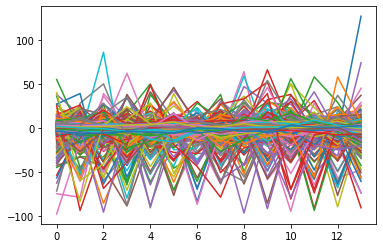

In [203]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cluster = np.where(kmeans_before.labels_ == 1)[0]
print(len(cluster))
for i in cluster:
    print(X[i])
    #Y1,Y2 = Embedding(X[i],X[i])
    #print(Y1,"\n")
    plt.plot(range(14),X[i])
    
plt.show()

In [204]:
def Transform1(X):
    transform_vectors = []
    Dict = {}
    for i in X:
        new_vec = []
        
        i = [x or 0.01 for x in i]
        
        for j in range(1,len(i)):
            
            if (i[j-1] > 0) & (i[j] < 0):
                new_vec.append(-abs(i[j-1] - i[j])/i[j-1])
                
            elif i[j-1] == i[j] == 0.01:
                new_vec.append(99)
                
            else:
                new_vec.append(abs(i[j-1] - i[j])/(i[j])**3)
                
        new_vec = 1/(1 + np.exp(-np.array(new_vec)))
        new_vec = new_vec.round(decimals=3)
        Dict[str(new_vec)] = i
        transform_vectors.append(new_vec)
        
    
    return Dict, transform_vectors   

In [205]:
def Transform2(X):
    transform_vectors = []
    Dict = {}
    for i in X:
        new_vec = []
        
        i = [x or 0.01 for x in i]
        
        for j in range(1,len(i)):
            
            if (i[j-1] > 0) & (i[j] < 0):
                new_vec.append(-abs(i[j-1] - i[j])/i[j-1])
                
            elif i[j-1] == i[j] == 0.01:
                new_vec.append(1)
                
            else:
                new_vec.append(abs(i[j-1] - i[j])/(i[j]))
                
#         for p in range(len(new_vec)):
#             if new_vec[p] > 1:
#                 new_vec[p] = 1
#             elif new_vec[p] < -1:
#                 new_vec[p] = -1
                
        new_vec = np.array(new_vec)  
        new_vec = new_vec.round(decimals=2)
        Dict[str(new_vec)] = i
        transform_vectors.append(new_vec)
        
    
    return Dict, transform_vectors

In [206]:
Transformed_Dict, T_X = Transform1(X)
 
print(X[0])
for i in T_X:
    print(i)
    break

/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


[11.0, -7.0, -2.0, -2.0, -0.0, 17.0, 1.8, 0.8, 1.1, 4.8, 4.6, 2.1, 2.0, 3.2]
[0.163 0.349 0.5   1.    0.501 0.931 0.876 0.556 0.508 0.501 0.567 0.503
 0.509]


In [207]:
kmeans_after = KMeans(n_clusters=25, random_state=0).fit(np.array(T_X))

49
[0.01, -1.0, 0.01, -1.0, -1.0, -2.0, -2.0, -1.0, -1.0, -1.0, -1.0, -13.0, 1.3, 2.6]
[0.    1.    0.    0.5   0.469 0.5   0.269 0.5   0.5   0.5   0.499 0.999
 0.518] 

[-2.0, 0.01, 0.01, -1.0, 0.5, 2.8, 1.1, 19.0, -2.0, 2.1, 4.1, 3.8, -8.0, -3.0]
[1.    1.    0.    1.    0.526 0.782 0.501 0.249 0.609 0.507 0.501 0.043
 0.454] 

[-1.0, -1.0, 0.01, -1.0, 0.01, -1.0, -1.0, -3.0, -3.0, -3.0, -2.0, -2.0, -1.0, -1.0]
[0.5   1.    0.    1.    0.    0.5   0.481 0.5   0.5   0.469 0.5   0.269
 0.5  ] 

[-1.0, 0.01, 0.01, -1.0, 3.4, -1.0, -1.0, -1.0, 0.01, 0.4, 0.8, 3.2, 1.4, 0.6]
[1.    1.    0.    0.528 0.215 0.5   0.5   1.    0.998 0.686 0.518 0.658
 0.976] 

[-3.0, -2.0, 0.01, -1.0, -1.0, -1.0, 1.2, 2.1, 0.6, 1.1, 0.9, 1.4, 1.0, 0.4]
[0.469 1.    0.    0.5   0.5   0.781 0.524 0.999 0.593 0.568 0.545 0.599
 1.   ] 

[0.5, 1.3, 1.3, -3.0, 0.4, 0.6, 1.4, 2.9, 3.3, 6.0, 2.1, 3.2, 3.0, 0.4]
[0.59  0.5   0.035 1.    0.716 0.572 0.515 0.503 0.503 0.604 0.508 0.502
 1.   ] 

[-2.0, -1.0, 0.01, -1.0

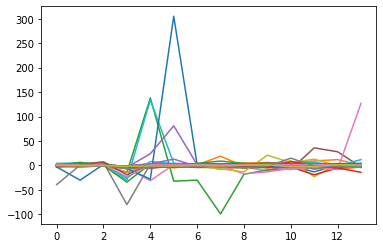

In [208]:
cluster = np.where(kmeans_after.labels_ == 0)[0]
print(len(cluster))
for i in cluster:
    
    print(Transformed_Dict[str(T_X[i])])
    print(T_X[i],"\n")
    #Y1,Y2 = Embedding(X[i],X[i])
    #print(Y1,"\n")
    plt.plot(range(14),Transformed_Dict[str(T_X[i])])
    
plt.show()

Distance  4.0


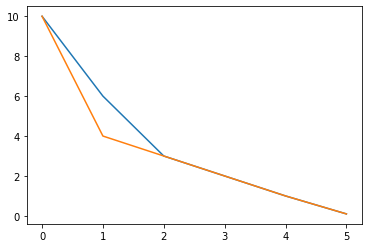

Distance  596
X =  [10, 40, 18, 3, 3, 10]
Y =  [10, 60, 4, 3, 3, 10]


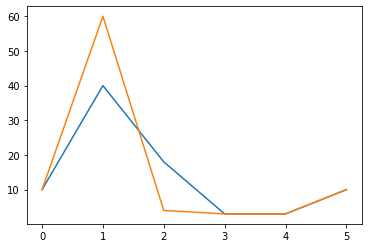

In [10]:
# x = [0.1,0.05, 0.03, 0.02, 0.02, 0.001]        
# y = [-0.1,-0.05,-0.03,-0.02,-0.01,-0.001]                                         # time Net_Debt_EBITDA  = Net_Debt/EBITDA

x = [10,6,3,2,1,0.1]
y = [10,4,3,2,1,0.1]

print("Distance ",sum((np.array(x) - np.array(y))**2))

plt.plot(range(len(x)),x)
plt.plot(range(len(y)),y)
plt.show()
def Embedding(x,y):
    
    X = [x[0]]
    Y = [y[0]]
    for i in range(1,len(x)):
        X.append(int(abs(x[i-1] - x[i])*x[i-1] +    (1/x[i])))
        Y.append(int(abs(y[i-1] - y[i])*y[i-1] +    (1/y[i]))) 
        
    return X,Y

X,Y = Embedding(x,y)

print("Distance ",sum((np.array(X) - np.array(Y))**2))
print("X = ",X)
print("Y = ",Y)
plt.plot(range(len(X)),X)
plt.plot(range(len(Y)),Y)
plt.show()
